# KMeans clustering 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel(r'D:\Data Scientist\Clustering\Non Hierarchical clustering\KMeans clustering\Datasets\University_Clustering.xlsx')

In [3]:
data

,UnivID,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1,Brown,RI,1310.0,89,22,13.0,22704,94.0
1,2,CalTech,CA,1415.0,100,25,6.0,63575,81.0
2,3,CMU,PA,1260.0,62,59,9.0,25026,72.0
3,4,Columbia,NY,1310.0,76,24,12.0,31510,NaN
4,5,Cornell,NY,1280.0,83,33,13.0,21864,90.0
5,6,Dartmouth,NH,1340.0,89,23,10.0,32162,95.0
6,7,Duke,NC,1315.0,90,30,12.0,31585,95.0
7,8,Georgetown,DC,NaN,74,24,12.0,20126,92.0
8,9,Harvard,MA,1400.0,91,14,11.0,39525,97.0
9,10,JohnsHopkins,MD,1305.0,75,44,7.0,58691,87.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UnivID    25 non-null     int64  
 1   Univ      25 non-null     object 
 2   State     25 non-null     object 
 3   SAT       24 non-null     float64
 4   Top10     25 non-null     int64  
 5   Accept    25 non-null     int64  
 6   SFRatio   24 non-null     float64
 7   Expenses  25 non-null     int64  
 8   GradRate  24 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.9+ KB


In [5]:
data.drop(['UnivID'], axis = 1,inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State     25 non-null     object 
 2   SAT       24 non-null     float64
 3   Top10     25 non-null     int64  
 4   Accept    25 non-null     int64  
 5   SFRatio   24 non-null     float64
 6   Expenses  25 non-null     int64  
 7   GradRate  24 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ KB


In [10]:
# EDA
import sweetviz as sv
s = sv.analyze(data)
s.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
data.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,24.000000,25.000000,25.000000,24.000000,25.000000,24.000000
mean,1266.916667,76.480000,39.200000,12.708333,27388.000000,86.666667
std,110.663578,19.433905,19.727308,4.154402,14424.883165,9.248580
min,1005.000000,28.000000,14.000000,6.000000,8704.000000,67.000000
25%,1236.250000,74.000000,24.000000,10.750000,15140.000000,80.750000
50%,1287.500000,81.000000,36.000000,12.000000,27553.000000,90.000000
75%,1345.000000,90.000000,50.000000,14.250000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.000000,63575.000000,97.000000


In [ ]:
# Null values

In [12]:
data.isna().sum()

Univ        0
State       0
SAT         1
Top10       0
Accept      0
SFRatio     1
Expenses    0
GradRate    1
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer

In [17]:
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [21]:
data['SAT'] = pd.DataFrame(mean_imputer.fit_transform(data[['SAT']]))
data['SAT'].isna().sum()

0

In [22]:
median_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

In [23]:
data['SFRatio'] = pd.DataFrame(median_imputer.fit_transform(data[['SFRatio']]))
data['SFRatio'].isna().sum()

0

In [24]:
data['GradRate'] = pd.DataFrame(mean_imputer.fit_transform(data[['GradRate']]))
data['GradRate'].isna().sum()

0

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State     25 non-null     object 
 2   SAT       25 non-null     float64
 3   Top10     25 non-null     int64  
 4   Accept    25 non-null     int64  
 5   SFRatio   25 non-null     float64
 6   Expenses  25 non-null     int64  
 7   GradRate  25 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ KB


In [ ]:
# outlier analysis using box plot

SAT            Axes(0.125,0.11;0.110714x0.77)
Top10       Axes(0.257857,0.11;0.110714x0.77)
Accept      Axes(0.390714,0.11;0.110714x0.77)
SFRatio     Axes(0.523571,0.11;0.110714x0.77)
Expenses    Axes(0.656429,0.11;0.110714x0.77)
GradRate    Axes(0.789286,0.11;0.110714x0.77)
dtype: object

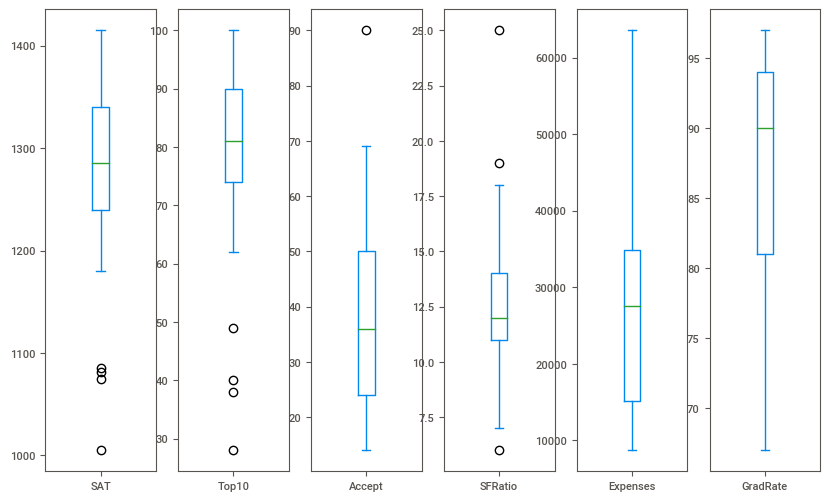

In [26]:
data.plot(kind = 'box', subplots = True, sharey = False, figsize =(10,6))

In [28]:
from feature_engine.outliers import Winsorizer

In [35]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                       tail = 'both',
                       fold = 1.5,
                       variables = ['SAT'])

In [36]:
data['SAT'] = pd.DataFrame(winsor_iqr.fit_transform(data[['SAT']]))

In [37]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                       tail = 'both',
                       fold = 1.5,
                       variables = ['Top10'])
data['Top10'] = pd.DataFrame(winsor_iqr.fit_transform(data[['Top10']]))

In [38]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                       tail = 'both',
                       fold = 1.5,
                       variables = ['Accept'])
data['Accept'] = pd.DataFrame(winsor_iqr.fit_transform(data[['Accept']]))

In [39]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                       tail = 'both',
                       fold = 1.5,
                       variables = ['SFRatio'])
data['SFRatio'] = pd.DataFrame(winsor_iqr.fit_transform(data[['SFRatio']]))

SAT            Axes(0.125,0.11;0.110714x0.77)
Top10       Axes(0.257857,0.11;0.110714x0.77)
Accept      Axes(0.390714,0.11;0.110714x0.77)
SFRatio     Axes(0.523571,0.11;0.110714x0.77)
Expenses    Axes(0.656429,0.11;0.110714x0.77)
GradRate    Axes(0.789286,0.11;0.110714x0.77)
dtype: object

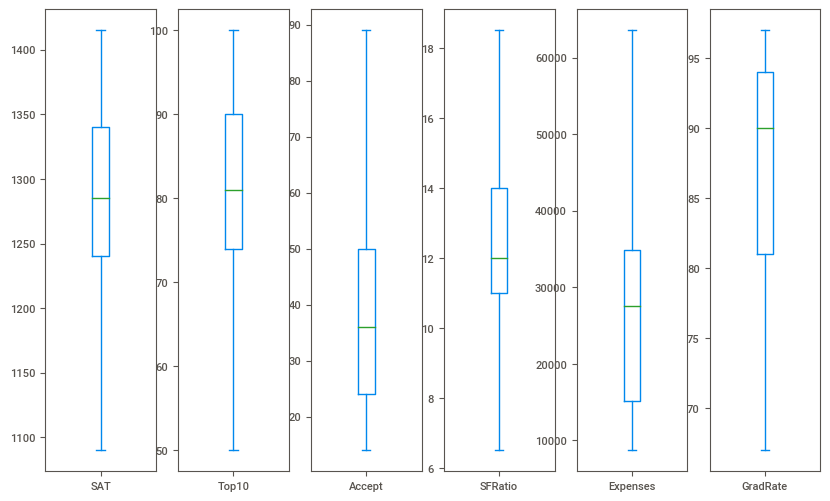

In [40]:
data.plot(kind = 'box', subplots = True , sharey = False, figsize = (10,6))

In [41]:
data.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310.0,89,22,13.0,22704,94.000000
1,CalTech,CA,1415.0,100,25,6.5,63575,81.000000
2,CMU,PA,1260.0,62,59,9.0,25026,72.000000
3,Columbia,NY,1310.0,76,24,12.0,31510,86.666667
4,Cornell,NY,1280.0,83,33,13.0,21864,90.000000


In [43]:
df_cate = data.iloc[ : , :2]
df_cate.head()

,Univ,State
0,Brown,RI
1,CalTech,CA
2,CMU,PA
3,Columbia,NY
4,Cornell,NY


In [ ]:
# categorical data convert into [0,1]

In [47]:
df_cate = pd.get_dummies(df_cate,drop_first = True)
df_cate.head()

,Univ_CMU,Univ_CalTech,Univ_Columbia,Univ_Cornell,Univ_Dartmouth,Univ_Duke,Univ_Georgetown,Univ_Harvard,Univ_JohnsHopkins,Univ_MIT,...,State_MI,State_NC,State_NH,State_NJ,State_NY,State_PA,State_RI,State_TX,State_VA,State_WI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
df_cate.shape

(25, 40)

In [44]:
df_num = data.iloc[ : ,2: ]
df_num.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310.0,89,22,13.0,22704,94.000000
1,1415.0,100,25,6.5,63575,81.000000
2,1260.0,62,59,9.0,25026,72.000000
3,1310.0,76,24,12.0,31510,86.666667
4,1280.0,83,33,13.0,21864,90.000000


In [45]:
col =list(df_num.columns)
col

['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate']

In [ ]:
# check data is normally distributed or not using probplot

In [49]:
import scipy.stats as stats
import pylab

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([1090.        , 1090.        , 1090.        , 1090.        ,
         1180.        , 1225.        , 1240.        , 1255.        ,
         1260.        , 1260.        , 1266.91666667, 1280.        ,
         1285.        , 1290.        , 1305.        , 1310.        ,
         1310.        , 1315.        , 1340.        , 1360.        ,
         1375.        , 1375.        , 1380.        , 1400.        ,
         1415.        ])),
 (98.76659036154764, 1271.4766666666667, 0.9585447047103507))

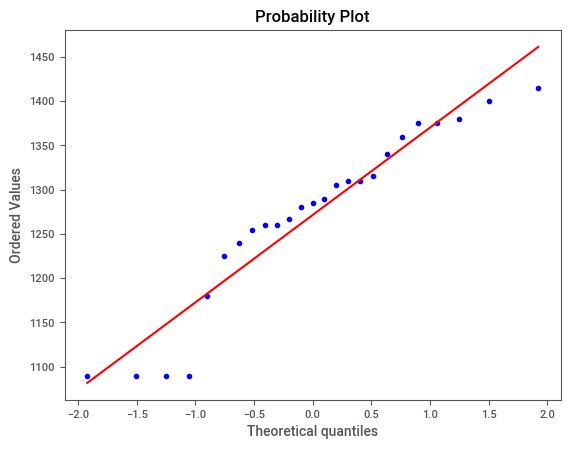

In [51]:
# SAT
stats.probplot(df_num['SAT'],dist = 'norm',plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 50,  50,  50,  50,  62,  65,  74,  75,  75,  76,  77,  80,  81,
          83,  85,  89,  89,  90,  90,  91,  91,  94,  95,  95, 100],
        dtype=int64)),
 (15.548174662321602, 78.28, 0.9511295549439862))

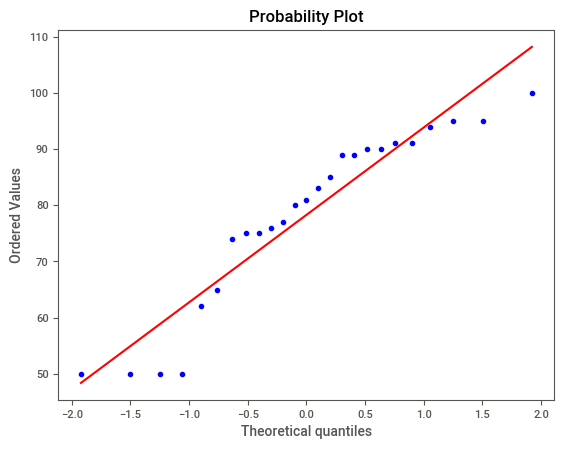

In [52]:
# Top10
stats.probplot(df_num['Top10'],dist = 'norm',plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([14, 14, 19, 20, 22, 23, 24, 24, 25, 30, 30, 33, 36, 39, 40, 42, 44,
         44, 50, 54, 59, 67, 68, 69, 89], dtype=int64)),
 (19.806179416701234, 39.16, 0.9658230149511989))

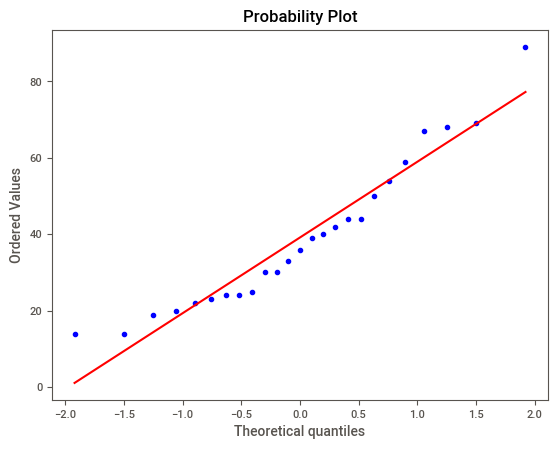

In [53]:
# Accept
stats.probplot(df_num['Accept'],dist = 'norm',plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 6.5,  7. ,  8. ,  9. , 10. , 10. , 11. , 11. , 11. , 11. , 12. ,
         12. , 12. , 12. , 12. , 13. , 13. , 13. , 14. , 15. , 16. , 17. ,
         18. , 18.5, 18.5])),
 (3.4058243652179456, 12.42, 0.9800284234738135))

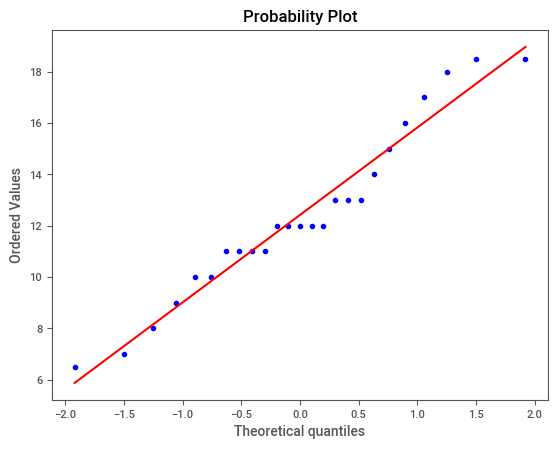

In [54]:
# SFRatio
stats.probplot(df_num['SFRatio'],dist = 'norm',plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 8704,  9066, 10185, 11857, 13349, 15122, 15140, 15470, 20126,
         21864, 22704, 25026, 27553, 28052, 30220, 31510, 31585, 32162,
         34870, 36450, 38380, 39525, 43514, 58691, 63575], dtype=int64)),
 (14567.431669324984, 27387.999999999996, 0.96623519023699))

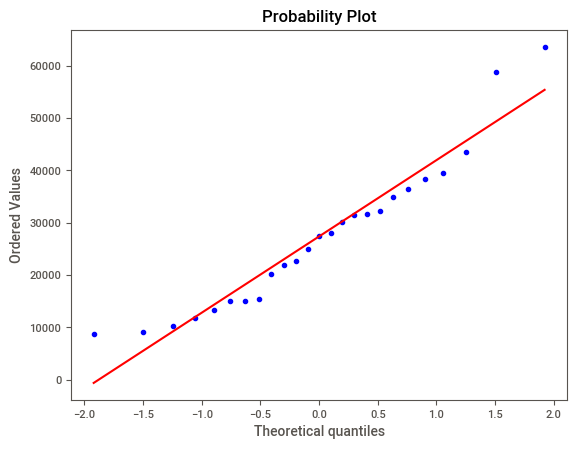

In [56]:
#Expenses
stats.probplot(df_num['Expenses'],dist = 'norm',plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([67.        , 69.        , 71.        , 72.        , 78.        ,
         80.        , 81.        , 85.        , 86.66666667, 87.        ,
         87.        , 89.        , 90.        , 90.        , 91.        ,
         92.        , 92.        , 93.        , 94.        , 94.        ,
         95.        , 95.        , 95.        , 96.        , 97.        ])),
 (8.891600322496434, 86.66666666666669, 0.9396340444989573))

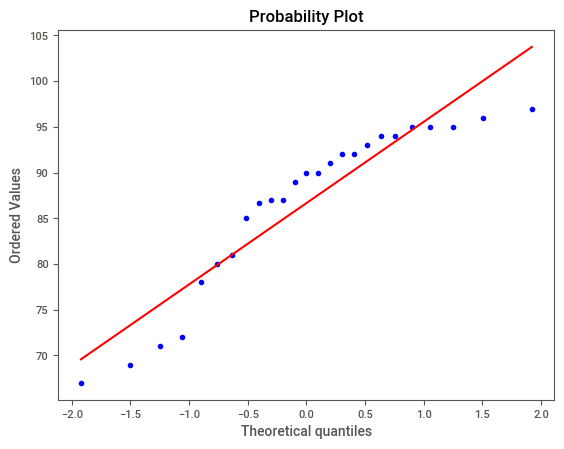

In [57]:
# GradRate
stats.probplot(df_num['GradRate'],dist = 'norm',plot = pylab)

data is normally distributed

In [ ]:
# use MinMaxScaler to normalized the data.

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()

In [60]:
df_num = pd.DataFrame(scaler.fit_transform(df_num),columns = col, index = df_num.index)

In [62]:
df_num.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.676923,0.78,0.106667,0.541667,0.255144,0.900000
1,1.000000,1.00,0.146667,0.000000,1.000000,0.466667
2,0.523077,0.24,0.600000,0.208333,0.297461,0.166667
3,0.676923,0.52,0.133333,0.458333,0.415629,0.655556
4,0.584615,0.66,0.253333,0.541667,0.239835,0.766667


In [63]:
df = pd.concat([df_cate,df_num],axis = 1)

In [65]:
df.head()

,Univ_CMU,Univ_CalTech,Univ_Columbia,Univ_Cornell,Univ_Dartmouth,Univ_Duke,Univ_Georgetown,Univ_Harvard,Univ_JohnsHopkins,Univ_MIT,...,State_RI,State_TX,State_VA,State_WI,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0.676923,0.78,0.106667,0.541667,0.255144,0.900000
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1.000000,1.00,0.146667,0.000000,1.000000,0.466667
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.523077,0.24,0.600000,0.208333,0.297461,0.166667
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.676923,0.52,0.133333,0.458333,0.415629,0.655556
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0.584615,0.66,0.253333,0.541667,0.239835,0.766667


In [66]:
df.describe()

,Univ_CMU,Univ_CalTech,Univ_Columbia,Univ_Cornell,Univ_Dartmouth,Univ_Duke,Univ_Georgetown,Univ_Harvard,Univ_JohnsHopkins,Univ_MIT,...,State_RI,State_TX,State_VA,State_WI,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,...,25.00,25.00,25.00,25.00,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,...,0.04,0.04,0.04,0.04,0.558390,0.565600,0.335467,0.493333,0.340508,0.655556
std,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,...,0.20,0.20,0.20,0.20,0.303338,0.312811,0.261610,0.277086,0.262887,0.301795
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.461538,0.480000,0.133333,0.375000,0.117293,0.466667
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.600000,0.620000,0.293333,0.458333,0.343515,0.766667
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.769231,0.800000,0.480000,0.625000,0.476864,0.900000
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Model Building Using KMeans clustering

In [67]:
from sklearn.cluster import KMeans

# scree plot/elbow curve

In [79]:
TWSS = []
k = list(range(2,9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    TWSS.append(kmeans.inertia_)

TWSS   

[46.534909743474024,
 43.269574847363714,
 39.724081537396074,
 37.37444493264967,
 34.681828175059415,
 31.645493992959327,
 29.05330992053674]

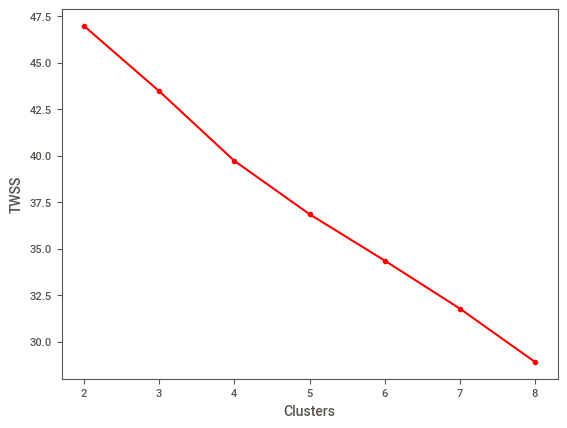

In [76]:
# scree plot/elbow curve

plt.plot(k,TWSS,'ro-');
plt.xlabel('Clusters');
plt.ylabel('TWSS');

In [ ]:
# KneeLocator

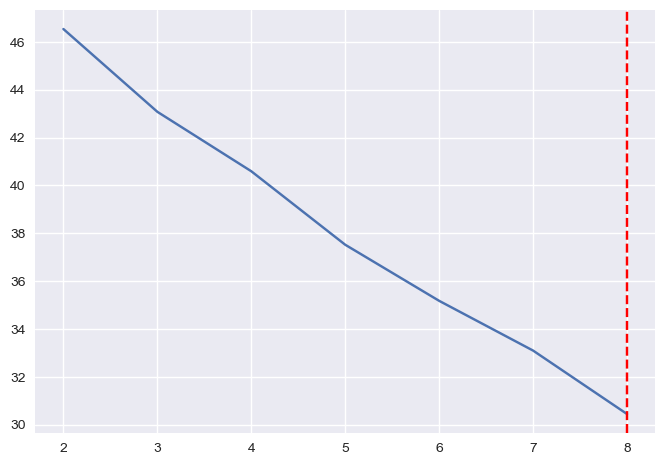

In [89]:
List = []

for k in range(2,9):
    kmeans = KMeans(n_clusters = k,init = 'random', max_iter = 30,random_state = 1, n_init = 10)
    kmeans.fit(df)
    List.append(kmeans.inertia_)
    
from kneed import KneeLocator

kl = KneeLocator(range(2,9), List, curve = 'convex')
kl.elbow
plt.style.use("seaborn")
plt.plot(range(2,9),List)
plt.xticks(range(2,9))
plt.axvline(x = kl.elbow, color = 'r',label = 'axvline - full height',ls = '--')
plt.show()

In [ ]:
# Using scree plot we decided to run k = 4

In [90]:
model = KMeans(n_clusters = 4)
yy = model.fit(df)

In [91]:
model.labels_

array([1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 3, 1, 3, 1, 1, 3, 2,
       1, 3, 1])

In [92]:
series = pd.Series(model.labels_)

In [95]:
data['Cluster'] = series

In [96]:
data.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,Brown,RI,1310.0,89,22,13.0,22704,94.000000,1
1,CalTech,CA,1415.0,100,25,6.5,63575,81.000000,1
2,CMU,PA,1260.0,62,59,9.0,25026,72.000000,2
3,Columbia,NY,1310.0,76,24,12.0,31510,86.666667,1
4,Cornell,NY,1280.0,83,33,13.0,21864,90.000000,1


In [ ]:
# check evaluation metric

In [97]:
from sklearn import metrics

In [98]:
metrics.silhouette_score(df,model.labels_)

0.16187505729127116

# Evaluation of Number of Clusters using Silhouette Coefficient Technique

In [99]:
from sklearn.metrics import silhouette_score

In [108]:
silhouette_coefficients = []

for k in range(2,9):
    kmeans = KMeans(n_clusters = k,init ='random',random_state =1)
    kmeans.fit(df)
    score = silhouette_score(df,kmeans.labels_)
    k=k
    sil_coeff = score
    silhouette_coefficients.append([k,sil_coeff])
  

In [109]:
silhouette_coefficients

[[2, 0.2750943552754984],
 [3, 0.1805807963516841],
 [4, 0.16187505729127116],
 [5, 0.091781063445537],
 [6, 0.13885644306253858],
 [7, 0.07178141248642887],
 [8, 0.06429029630423254]]

# k = 2 Best value

In [110]:
k = KMeans(n_clusters = 2)
k1 = k.fit(df)

In [111]:
k.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1])

In [112]:
series = pd.Series(k.labels_)

In [121]:
data['Cluster_2'] = series

In [122]:
data.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster(k=2),Cluster_2
0,Brown,RI,1310.0,89,22,13.0,22704,94.000000,1,1
1,CalTech,CA,1415.0,100,25,6.5,63575,81.000000,1,1
2,CMU,PA,1260.0,62,59,9.0,25026,72.000000,0,0
3,Columbia,NY,1310.0,76,24,12.0,31510,86.666667,1,1
4,Cornell,NY,1280.0,83,33,13.0,21864,90.000000,1,1


In [123]:
data.drop(['Cluster(k=2)'],axis = 1,inplace = True)

In [124]:
data.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster_2
0,Brown,RI,1310.0,89,22,13.0,22704,94.000000,1
1,CalTech,CA,1415.0,100,25,6.5,63575,81.000000,1
2,CMU,PA,1260.0,62,59,9.0,25026,72.000000,0
3,Columbia,NY,1310.0,76,24,12.0,31510,86.666667,1
4,Cornell,NY,1280.0,83,33,13.0,21864,90.000000,1


In [125]:
data.iloc[ : ,2:8].groupby(data.Cluster_2).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Cluster_2,,,,,,
0,1155.000000,58.142857,63.142857,15.142857,15408.714286,76.285714
1,1316.773148,86.111111,29.833333,11.361111,32046.611111,90.703704
